In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the data in
test = pd.read_csv('/home/kilian/Desktop/Projects/test.csv')
train = pd.read_csv('/home/kilian/Desktop/Projects/train.csv')
print(test.shape)

(28000, 784)


In [3]:
from keras.utils import to_categorical
#splitting training set into labels and images
train_x, test_x = train.iloc[:,1:].values , test.iloc[:,:].values
train_y = train['label']
print("the shape of train_x is: " , train_x.shape, "the shape of test_x is: ", test_x.shape 
      , "\nthe shape of train_y is: ", train_y.shape,"\n")
#preprocess
train_X, test_X = train_x.reshape(42000,28,28,1) , test_x.reshape(28000,28,28,1)
train_Y  = to_categorical(train_y) #'one-hot-encode' the target
print("the shape of train_X is: " , train_X.shape, "the shape of test_X is: "
      , "\nthe shape of test_Y is:", train_Y.shape)



the shape of train_x is:  (42000, 784) the shape of test_x is:  (28000, 784) 
the shape of train_y is:  (42000,) 

the shape of train_X is:  (42000, 28, 28, 1) the shape of test_X is:  
the shape of test_Y is: (42000, 10)


In [4]:
from sklearn.model_selection import train_test_split
#split the data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y , test_size=0.20, random_state=42)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.3878 - accuracy: 0.9355 - val_loss: 0.1342 - val_accuracy: 0.9586
Epoch 2/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0802 - accuracy: 0.9755 - val_loss: 0.1197 - val_accuracy: 0.9606
Epoch 3/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0486 - accuracy: 0.9842 - val_loss: 0.1320 - val_accuracy: 0.9694
Epoch 4/10
1050/1050 [==============================] - 18s 18ms/step - loss: 0.0392 - accuracy: 0.9873 - val_loss: 0.1208 - val_accuracy: 0.9718
Epoch 5/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.1202 - val_accuracy: 0.9751
Epoch 6/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0269 - accuracy: 0.9917 - val_loss: 0.1765 - val_accuracy: 0.9738
Epoch 7/10
1050/1050 [==============================] - 18s 18ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.1526 -

[[8.0900602e-09 1.7277723e-07 5.8054220e-06 6.5065836e-10 3.2704100e-11
  3.8742323e-10 5.9790956e-10 1.7162017e-14 9.9999392e-01 1.0141215e-07]
 [7.1336300e-16 9.9999988e-01 6.4405816e-12 6.3426526e-16 1.0005305e-07
  6.5452483e-13 1.6182960e-13 1.3088924e-13 2.7055160e-11 3.5265530e-18]
 [9.1641655e-10 2.6208344e-10 2.4277793e-11 8.5693784e-05 5.7206064e-05
  4.9933265e-06 8.9215866e-14 1.4509640e-04 1.2503856e-08 9.9970692e-01]
 [1.0615492e-11 7.3148455e-17 8.3054792e-11 1.0041188e-05 2.8701661e-05
  2.8676965e-08 2.3049740e-13 3.8610894e-02 1.8928965e-07 9.6135008e-01]]


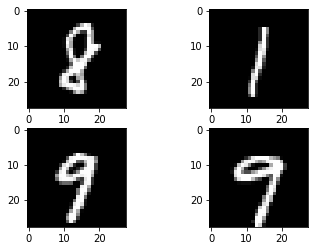

In [28]:
#predict first 4 images in the test set
print(model.predict(X_test[:4]))

#actual results for first 4 images in test set
y_test[:4]

#visualize the first 4 images
# show images
X_test_r = X_test.reshape(8400,28,28)
plt.subplot(2, 2, 1)
plt.imshow(X_test_r[0], cmap='gray')
plt.title('')
plt.subplot(2, 2, 2)
plt.imshow(X_test_r[1], cmap='gray')
plt.title('')
plt.subplot(2, 2, 3)
plt.imshow(X_test_r[2], cmap='gray')
plt.title('')
plt.subplot(2, 2, 4)
plt.imshow(X_test_r[3], cmap='gray')
plt.title('')
plt.show()


In [30]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/3
1050/1050 [==============================] - 37s 36ms/step - loss: 0.2239 - accuracy: 0.9438 - val_loss: 0.0898 - val_accuracy: 0.9727
Epoch 2/3
1050/1050 [==============================] - 37s 35ms/step - loss: 0.0642 - accuracy: 0.9804 - val_loss: 0.0771 - val_accuracy: 0.9770
Epoch 3/3
1050/1050 [==============================] - 37s 36ms/step - loss: 0.0418 - accuracy: 0.9869 - val_loss: 0.0959 - val_accuracy: 0.9749


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='CategoricalAccuracy')

#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1050/1050 [==============================] - 49s 47ms/step - loss: 0.1835 - categorical_accuracy: 0.9503 - accuracy: 0.9503 - val_loss: 0.0760 - val_categorical_accuracy: 0.9770 - val_accuracy: 0.9770
Epoch 2/10
1050/1050 [==============================] - 49s 47ms/step - loss: 0.0638 - categorical_accuracy: 0.9806 - accuracy: 0.9806 - val_loss: 0.0802 - val_categorical_accuracy: 0.9769 - val_accuracy: 0.9769
Epoch 3/10
1050/1050 [==============================] - 50s 47ms/step - loss: 0.0486 - categorical_accuracy: 0.9841 - accuracy: 0.9841 - val_loss: 0.0928 - val_categorical_accuracy: 0.9724 - val_accuracy: 0.9724
Epoch 4/10
1050/1050 [==============================] - 50s 48ms/step - loss: 0.0363 - categorical_accuracy: 0.9884 - accuracy: 0.9884 - val_loss: 0.0693 - val_categorical_accuracy: 0.9808 - val_accuracy: 0.9808
Epoch 5/10
1050/1050 [==============================] - 49s 47ms/step - loss: 0.0315 - categorical_accuracy: 0.9896 - accuracy: 0.9896 - val_loss: 0.090